In [1]:
import os
from typing import TypedDict

from dotenv import load_dotenv

load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")





In [7]:
#define state of graph

from typing import TypedDict
class State(TypedDict):
    graph_state: str




In [23]:
#define nodes, node operated on state

def node_One(State: State):
    print("in Node_one")
    return {"graph_state": State["graph_state"] + "This is node one"}
def node_Two(State: State):
    print("in Node_Two")
    return {"graph_state": State["graph_state"] + "This is node two"}
def node_Three(State: State):
    print("in Node_three")
    return {"graph_state": State["graph_state"] + "This is node three"}


In [24]:
#edges - how we connect the nodes
#ramdomly choose a number to goto two or three
from typing import Literal
import random

def decide_node(state: State)-> Literal["node_Two", "node_Three"]:

    if random.randint(0,1) == 0:
        return "node_Two"
    else:
        return "node_Three"

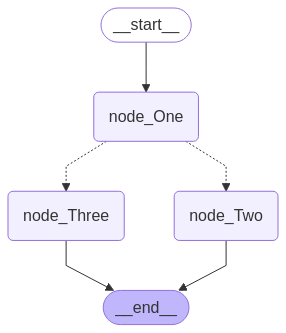

In [25]:
#now we build a stategraph
from langgraph.graph import START,END,StateGraph
from IPython.display import display,Image

builder=StateGraph(State)
#adding the available nodes
builder.add_node(node_One, "node_One")
builder.add_node(node_Two, "node_Two")
builder.add_node(node_Three, "node_Three")

#setting edges
builder.add_edge(START, "node_One")
builder.add_conditional_edges("node_One",decide_node)
builder.add_edge("node_Two",END)
builder.add_edge("node_Three",END)

#setting graph
graph=builder.compile()

#view the graph
display(Image(graph.get_graph().draw_mermaid_png()))




In [26]:
graph.invoke({"graph_state":"This is an example of graph state"})

in Node_one
in Node_Two


{'graph_state': 'This is an example of graph stateThis is node oneThis is node two'}